In [1]:
import numpy as np
np.random.seed(123)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D #, Convolution2D - old Keras implementation;
from keras.layers.convolutional import Conv2D
from keras import backend as K
from keras.utils import np_utils
import scipy.stats as sp

# good github example: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py



Using TensorFlow backend.


In [2]:
# load images from MNIST

from keras.datasets import mnist

In [109]:
# loading in the pre-shuffled data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [112]:
print(X_train.shape)
print(x_train.shape) # see, we added this so Tensorflow can read in the information


(60000, 28, 28)
(60000, 28, 28, 1)


In [113]:

type(X_train)


numpy.ndarray

In [114]:

X_train[1]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

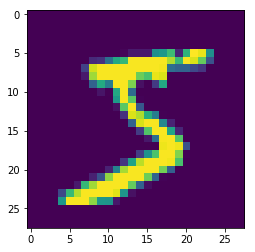

In [115]:
# confirm via plot:

from matplotlib import pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [116]:
X_train.min()

0

In [117]:
X_train.max()

255

In [120]:
# Change the data type:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [121]:
# normalize to a value of 1: 

x_train /= 255
x_test /= 255

In [122]:
# class label data view:

print(y_train.shape)

(60000,)


In [123]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [124]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test, 10)

In [125]:
Y_train.shape

(60000, 10)

In [129]:
# now, we can define the model architecture

# first declare the sequential model format:

model = Sequential()

# declare the input layer for CNN:



# convolution 2D : number of convolution filters to use, the number of rows in each convulution kernel, and the number of columns in each convolution kernel
# input shape: depth, width and height of the input image

# step size if (1,1) by defauly and can be tuned using hte 'subsample param

# issue solution: https://stackoverflow.com/questions/41651628/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d

# just changed the ordering to : cols, rows, 1




In [130]:
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))

In [131]:
print( model.output_shape)

(None, 26, 26, 32)


In [132]:
# now add layers:

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [133]:
# Now, let's connect the Dense layers: fully connected dense layers
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [134]:
# compile the model - define the loss function and optimizer:

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics =['accuracy'])

In [135]:
# fit the model to the training data:

model.fit(x_train, Y_train, batch_size = 32, nb_epoch = 10, verbose = 1)

# verbose = 1 just prints each log line for every batch; can equal 1


C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 74s - loss: 0.2043 - acc: 0.9381    
Epoch 2/10
60000/60000 [==============================] - 74s - loss: 0.0853 - acc: 0.9748    
Epoch 3/10
60000/60000 [==============================] - 74s - loss: 0.0667 - acc: 0.9804    
Epoch 4/10
60000/60000 [==============================] - 78s - loss: 0.0536 - acc: 0.9839    
Epoch 5/10
60000/60000 [==============================] - 76s - loss: 0.0460 - acc: 0.9859    
Epoch 6/10
60000/60000 [==============================] - 75s - loss: 0.0400 - acc: 0.9875    
Epoch 7/10
60000/60000 [==============================] - 74s - loss: 0.0368 - acc: 0.9884    
Epoch 8/10
60000/60000 [==============================] - 74s - loss: 0.0320 - acc: 0.9898    
Epoch 9/10
60000/60000 [==============================] - 74s - loss: 0.0314 - acc: 0.9894    
Epoch 10/10
60000/60000 [==============================] - 74s - loss: 0.0290 - acc: 0.9905    


In [136]:
score = model.evaluate(x_test, Y_test, verbose = 0)

In [141]:
print( 'With a loss of', '%.4f' % score[0], 'we got an accuracy of: ', '%.4f' % score[1] )


With a loss of 0.0285 we got an accuracy of:  0.9924
